<a href="https://colab.research.google.com/github/mgupta325/nlp1/blob/master/course3_wk3_sequence_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1W349H/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1W349H/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1W349H/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 60s 152ms/step - loss: 0.5552 - accuracy: 0.7158 - val_loss: 0.5412 - val_accuracy: 0.7662
Epoch 2/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3724 - accuracy: 0.8474 - val_loss: 0.3927 - val_accuracy: 0.8370
Epoch 3/10
391/391 [==============================] - 62s 158ms/step - loss: 0.3781 - accuracy: 0.8403 - val_loss: 0.4822 - val_accuracy: 0.7770
Epoch 4/10
391/391 [==============================] - 61s 157ms/step - loss: 0.5801 - accuracy: 0.6949 - val_loss: 0.6491 - val_accuracy: 0.6223
Epoch 5/10
391/391 [==============================] - 61s 156ms/step - loss: 0.4934 - accuracy: 0.7694 - val_loss: 0.5411 - val_accuracy: 0.7578
Epoch 6/10
391/391 [==============================] - 61s 156ms/step - loss: 0.3348 - accuracy: 0.8666 - val_loss: 0.4231 - val_accuracy: 0.8098
Epoch 7/10
391/391 [==============================] - 63s 160ms/step - loss: 0.2406 - accuracy: 0.9070 - val_loss: 0.4097 - val_ac

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

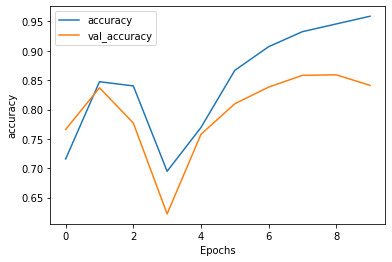

In [12]:
plot_graphs(history, 'accuracy')

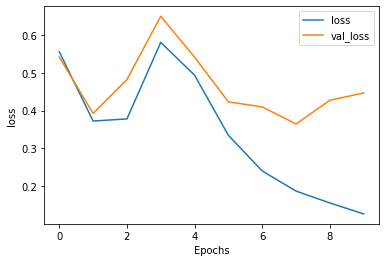

In [13]:
plot_graphs(history, 'loss')

# Multiple Layer LSTM

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 7
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/7
391/391 [==============================] - 107s 275ms/step - loss: 0.5727 - accuracy: 0.7118 - val_loss: 0.5148 - val_accuracy: 0.7592
Epoch 2/7
391/391 [==============================] - 107s 273ms/step - loss: 0.3875 - accuracy: 0.8393 - val_loss: 0.4048 - val_accuracy: 0.8265
Epoch 3/7
391/391 [==============================] - 108s 276ms/step - loss: 0.4057 - accuracy: 0.8230 - val_loss: 0.4785 - val_accuracy: 0.7880
Epoch 4/7
391/391 [==============================] - 108s 276ms/step - loss: 0.3241 - accuracy: 0.8684 - val_loss: 0.3360 - val_accuracy: 0.8580
Epoch 5/7
391/391 [==============================] - 108s 276ms/step - loss: 0.2089 - accuracy: 0.9221 - val_loss: 0.3295 - val_accuracy: 0.8620
Epoch 6/7
391/391 [==============================] - 109s 279ms/step - loss: 0.1561 - accuracy: 0.9446 - val_loss: 0.3575 - val_accuracy: 0.8725
Epoch 7/7
391/391 [==============================] - 109s 278ms/step - loss: 0.1149 - accuracy: 0.9625 - val_loss: 0.4105 - val_ac

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

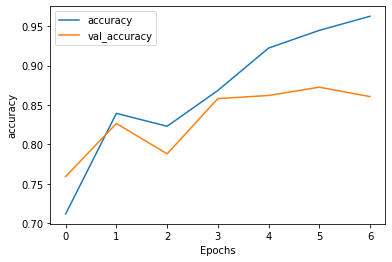

In [19]:
plot_graphs(history, 'accuracy')

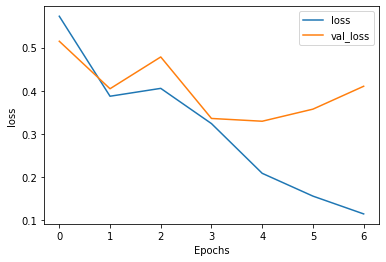

In [20]:
plot_graphs(history, 'loss')

# convolutional layer with global avg. pooling

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
NUM_EPOCHS = 7
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/7
391/391 [==============================] - 24s 62ms/step - loss: 0.4504 - accuracy: 0.7775 - val_loss: 0.3074 - val_accuracy: 0.8771
Epoch 2/7
391/391 [==============================] - 16s 42ms/step - loss: 0.2206 - accuracy: 0.9172 - val_loss: 0.3041 - val_accuracy: 0.8772
Epoch 3/7
391/391 [==============================] - 16s 40ms/step - loss: 0.1705 - accuracy: 0.9367 - val_loss: 0.3308 - val_accuracy: 0.8692
Epoch 4/7
391/391 [==============================] - 15s 39ms/step - loss: 0.1368 - accuracy: 0.9520 - val_loss: 0.3731 - val_accuracy: 0.8662
Epoch 5/7
391/391 [==============================] - 15s 39ms/step - loss: 0.1091 - accuracy: 0.9616 - val_loss: 0.4329 - val_accuracy: 0.8650
Epoch 6/7
391/391 [==============================] - 15s 38ms/step - loss: 0.0882 - accuracy: 0.9709 - val_loss: 0.4897 - val_accuracy: 0.8622
Epoch 7/7
391/391 [==============================] - 15s 37ms/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.5720 - val_accuracy: 0.8594

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

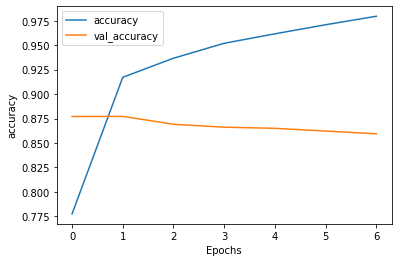

In [26]:
plot_graphs(history, 'accuracy')

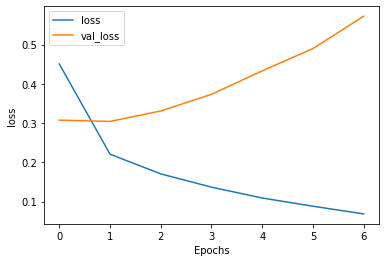

In [27]:
plot_graphs(history, 'loss')